# 1. 사전 세팅

In [ ]:
# Warnings 제거
import warnings
warnings.filterwarnings('ignore')

%cd "/content/drive/MyDrive/데이터 분석/projects/ML_protfoilo/4_air_quality_humidity_regression"

# 2. 문제 정의

---

    2차 산업 혁명 이후 전 지구상 대기질은 지속적으로 나빠지고 있다.
    공기질에 영향을 미치는 다양한 Feature를 분석하고,
    Regression 모델링으로 다양한 변수와 상대 습도의 상관 관계를 학습하는 모델을 구축한다.

## 2.1. 도메인 지식

---

▸ 공기질 분석

    모든 산업에는 공기질뿐만 아니라 기상과 같은 분석이 반드시 이루어지기 마련이다.

▸ 연도, 월, 일이 가지는 정보

    계절성, 연평균 기온의 변화, 일별 기온의 변화 등을 가질 수 있다.

▸ 휘발성 유기 화합물(Volatile Organic Compounds)

    벤젠, 포름알데히드 등 대기 환경에서 흔히 관측되는 오염 물질이다.
    일부 유아용품(젖병 등)을 소독(삶기)하는 과정에서 이러한 VOCs가 발생하여 실내 공기질을 악화시킬 수 있으며,
    실제로 영유아를 키우는 주택의 실내 VOC 농도가 높게 측정된 연구 사례도 존재한다.

▸ 센서 데이터의 특징

    센서 데이터는 보통 결측이 존재한다. 전기 보급률이 좋지 않은 국가에서는 특히 !

▸ 공장 습도의 유지

    헤파 필터는 몇 중으로 조건을 걸어 특정 물질은 거르고, 거르지 않는 특성을 지닌다.
    공장도 마찬가지로 환기 시설이 가장 중요한데, 이를 제어할 때 필터가 굉장히 중요한 역할을 수행한다.

# 3. 데이터 확인

## 3.1. 데이터 명세

---

    상대 습도 정보와 대기 내 공기질 정보
    Absolute Humidity가 기본적인 상식과 다를 수 있음

| Column | Description |
|:----|:----|
| Date | 날짜(DD/MM/YYYY) |
| Time | 시각(HH.MM.SS) |
| CO(GT) | CO in mg/m³ |
| PT08.S1 | tin oxide |
| NMHC(GT) | Non Metanic HydroCarbons |
| C6H6(GT) | Benzene in microg/m³ |
| PT08.S2(NMHC) | titania |
| NOx(GT) | ppb |
| PT08.S3(NOx) | tungsten oxide |
| NO2(GT) | NO2 in microg/m³ |
| PT08.S4(NO2) | tungsten oxide |
| PT08.S5(O3) | indium oxide |
| T | Temperature |
| RH | Relative Humidity |
| AH | Absolute Humidity |

## 3.2. 데이터 가공 명세

---

| 명세 | 내용 |
|:----|:----|
| 가공 범위 | <input type="checkbox" checked> Feature(Column) 변형<br> <input type="checkbox">기간 단위 데이터 분석 및 Big Volume 특성을 반영하기 위한 데이터 증강<br> <input type="checkbox" checked>다양한 Table을 참조하기 위한 데이터 분할|
| 가공 상세 | <b>Feature(Column) 변형</b><br><br>- 문자열로 저장되어있는 DATA, TIME 변수에서 월(MONTH), 시(HOUR) 정보를 추출<br><br><b>데이터 분할</b><br><br>- 검증을 위해 학습 데이터 60%, 검증 데이터 40%로 분할 |
| 가공 결과 | <b>As is</b><br><br>- row: 9471 / column: 15 / table: 1<br><br> <b>To be</b><br><br>- row: 9357(-114) / column: 17(+2) / table: 1  |

## 3.3. 데이터 살펴보기

In [ ]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

df = pd.read_csv('Data/AirQualityUCI.csv')
df

# 4. 문제 해결 프로세스 정의

---

▸ 문제

    공기질에 영향을 미치는 데이터들이 어떤 특성에 영향을 받는지 분석한다.
    
▸ 기대 효과

    대기를 구성하고 있는 성분을 통해 상대 습도에 대한 예측이 가능하다면 다양한 분야에 접목 가능할 것이다.

▸ 해결 방안

    다양한 Regression 방법 적용을 통해 영향 정도 분석
    Linear Regression / Logistic Regression / Decision Tree
    Random Forest / Support Vector Machine

▸ 성과 측정

    각 모델의 Error

▸ 현업 적용

    제조업에서는 습도 관리가 필수, 습도 변화를 분석할 수 있는 역량 강화

# 5. 데이터 추가 확인 및 전처리

In [ ]:
cols = ['DATE', 'TIME', 'CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT', 'PT08_S2_NMHC',
        'NOX_GT', 'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_03', 'T', 'RH', 'AH']

In [ ]:
r = list(np.arange(len(cols)))
df = pd.read_csv('Data/AirQualityUCI.csv', header=None, skiprows=1, names=cols,
                 na_filter=True, na_values=-100, usecols=r)

df.head(10)

In [ ]:
df.tail(10)

In [ ]:
df.dtypes

In [ ]:
df.describe()

In [ ]:
df.isin([-200]).sum()

In [ ]:
df.info()

In [ ]:
import matplotlib.pyplot as plt

df.drop(['DATE'], axis=1).hist(figsize=(18, 9))
plt.show()

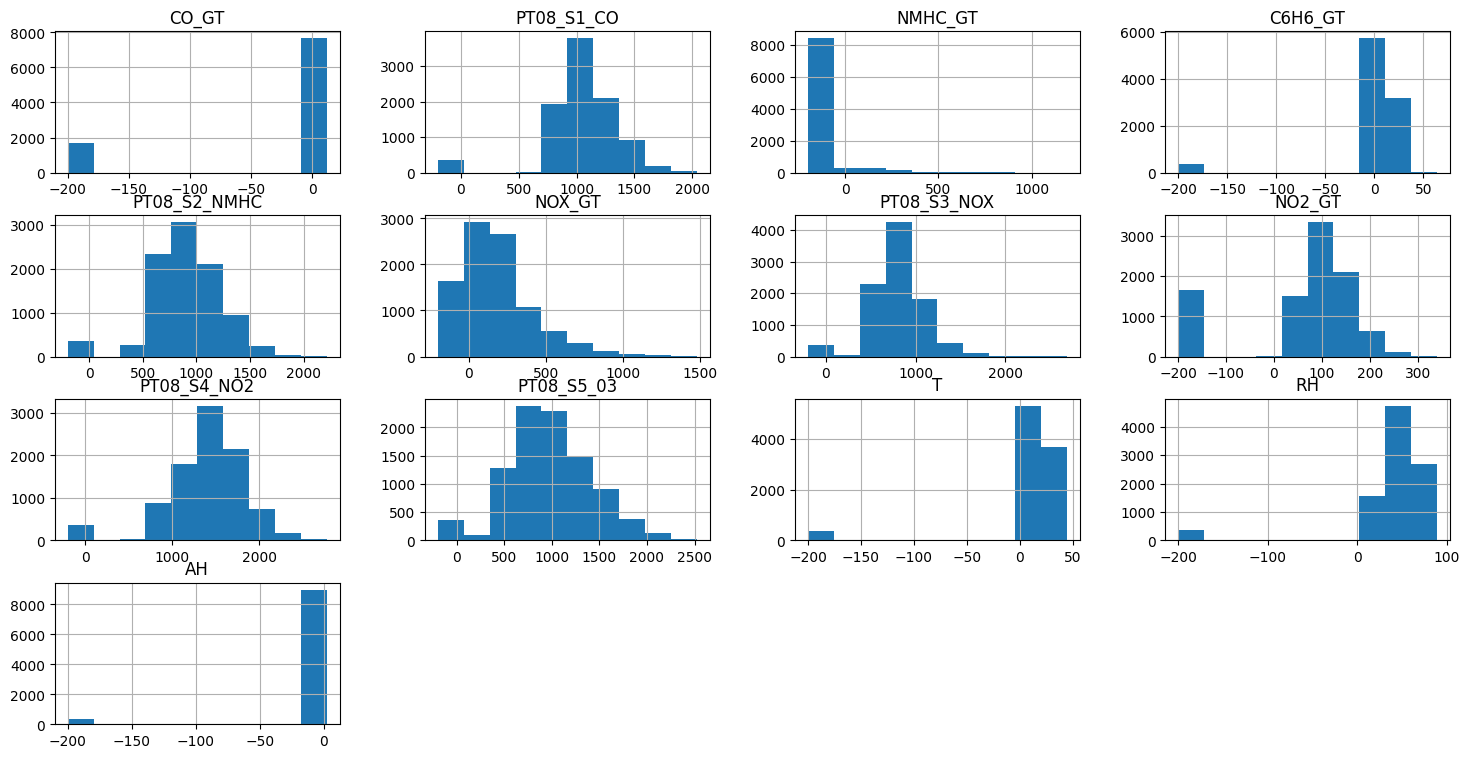

## 5.1. Data Readiness Check

In [ ]:
import matplotlib as mpl

import patsy
from patsy import dmatrices
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

import seaborn as sns
%matplotlib inline

In [ ]:
cols = ['DATE', 'TIME', 'CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT', 'PT08_S2_NMHC',
        'NOX_GT', 'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_03', 'T', 'RH', 'AH']

r = list(np.arange(len(cols)))

# Header를 붙여서 업로드하면 Error가 발생하는 시스템이 종종 있음
df = pd.read_csv('Data/AirQualityUCI.csv', header=None, skiprows=1, names=cols,
                 na_filter=True, na_values=-100, usecols=r)

In [ ]:
print(f'df: {df.shape}')



```
df: (9471, 15)
```



In [ ]:
df.info()



```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          9357 non-null   object
 1   TIME          9357 non-null   object
 2   CO_GT         9357 non-null   float64
 3   PT08_S1_CO    9357 non-null   float64
 4   NMHC_GT       9357 non-null   float64
 5   C6H6_GT       9357 non-null   float64
 6   PT08_S2_NMHC  9357 non-null   float64
 7   NOX_GT        9357 non-null   float64
 8   PT08_S3_NOX   9357 non-null   float64
 9   NO2_GT        9357 non-null   float64
 10  PT08_S4_NO2   9357 non-null   float64
 11  PT08_S5_03    9357 non-null   float64
 12  T             9357 non-null   float64
 13  RH            9357 non-null   float64
 14  AH            9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB
```



In [ ]:
# Target이 NaN인 데이터 탐색
# Target이 NaN인 애들은 버릴 수 밖에 없음 !! 정답을 못 맞추기 때문
df[df['RH'].isna()].head()

In [ ]:
df.dropna(how='all', inplace=True)
df.tail(10)

In [ ]:
df.describe()

In [ ]:
df.shape



```
(9357, 15)
```



In [ ]:
df.isna().sum()

# 6. Feature Engineering

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
obj_cols = df.select_dtypes(include=object).columns.tolist()

# RH까지 스케일링하게 되면 맞춰야할 값의 범위가 작아지기 때문에 어려울 수 있음
num_cols.remove('RH')

# 값의 범위가 천차만별이기 때문에 표준화
scaler = StandardScaler()
df_obj = df[obj_cols]
df_scaled = scaler.fit_transform(df[num_cols])
df_scaled = pd.DataFrame(df_scaled, index=df.index, columns=num_cols)

df = pd.concat([df_scaled, df['RH'], df_obj], axis=1)

In [ ]:
df.head()

In [ ]:
# 컬럼 re-ordering 목적
df = df[cols]
df.head()

In [ ]:
# 월 변수 추가
df['DATE'] = pd.to_datetime(df.DATE, format='%d-%m-%Y')
df['MONTH'] = df['DATE'].dt.month
df.head()

In [ ]:
# HOUR 변수 추가
df['HOUR'] = df['TIME'].apply(lambda x: int(x.split(':')[0]))
df.HOUR.head()

# 7. EDA

In [ ]:
sns.set(rc={'figure.figsize':(14, 9)})

In [ ]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, linewidths=.4)
plt.title('Heatmap of correlation between variables', fontsize=16)
plt.show()

    다중공선성 문제를 뒤로 하고, 독립변수와 종속변수 간의 관계만을 보면 Tree류 모델로도 충분히 좋은 성능을 보일 것이라고 예상된다.

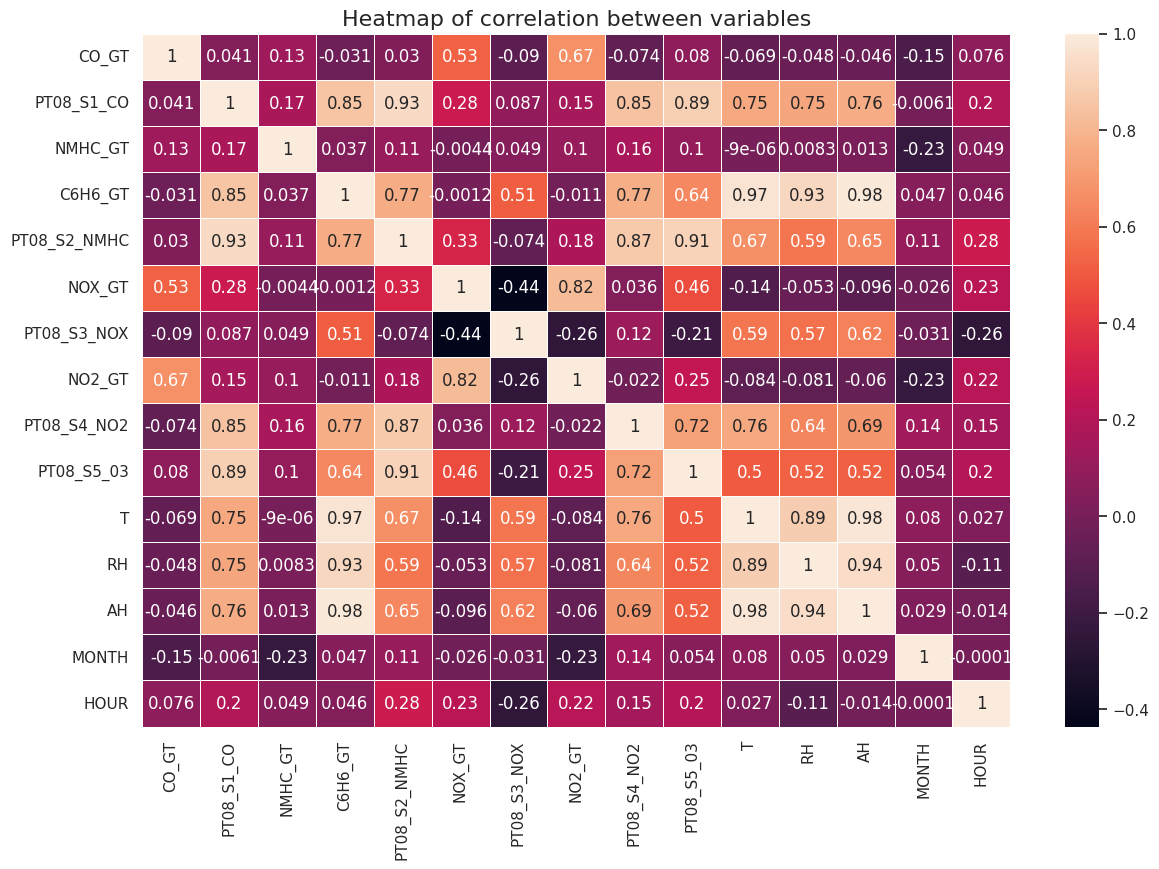

In [ ]:
# 상관계수 계산해서
corrs = df.corr(numeric_only=True)['RH'].drop('RH').sort_values(ascending=False)
cols_sorted = corrs.index.tolist()

plt.figure(figsize=(16, 4 * ((len(cols_sorted) + 3)//4)))

# 각각을 regplot(regression plot; 회귀선과 함께)으로 그리기
for i, col in enumerate(cols_sorted):
    plt.subplot((len(cols_sorted) + 3)//4, 4, i + 1)
    sns.regplot(x=col, y='RH', data=df, scatter_kws={'s':10, 'alpha':0.6}, line_kws={'color':'red'})
    plt.title(f'{col} (corr={corrs[col]:.2f})', fontsize=9)
    plt.xlabel(col)
    plt.ylabel('RH')

plt.tight_layout()
plt.show()

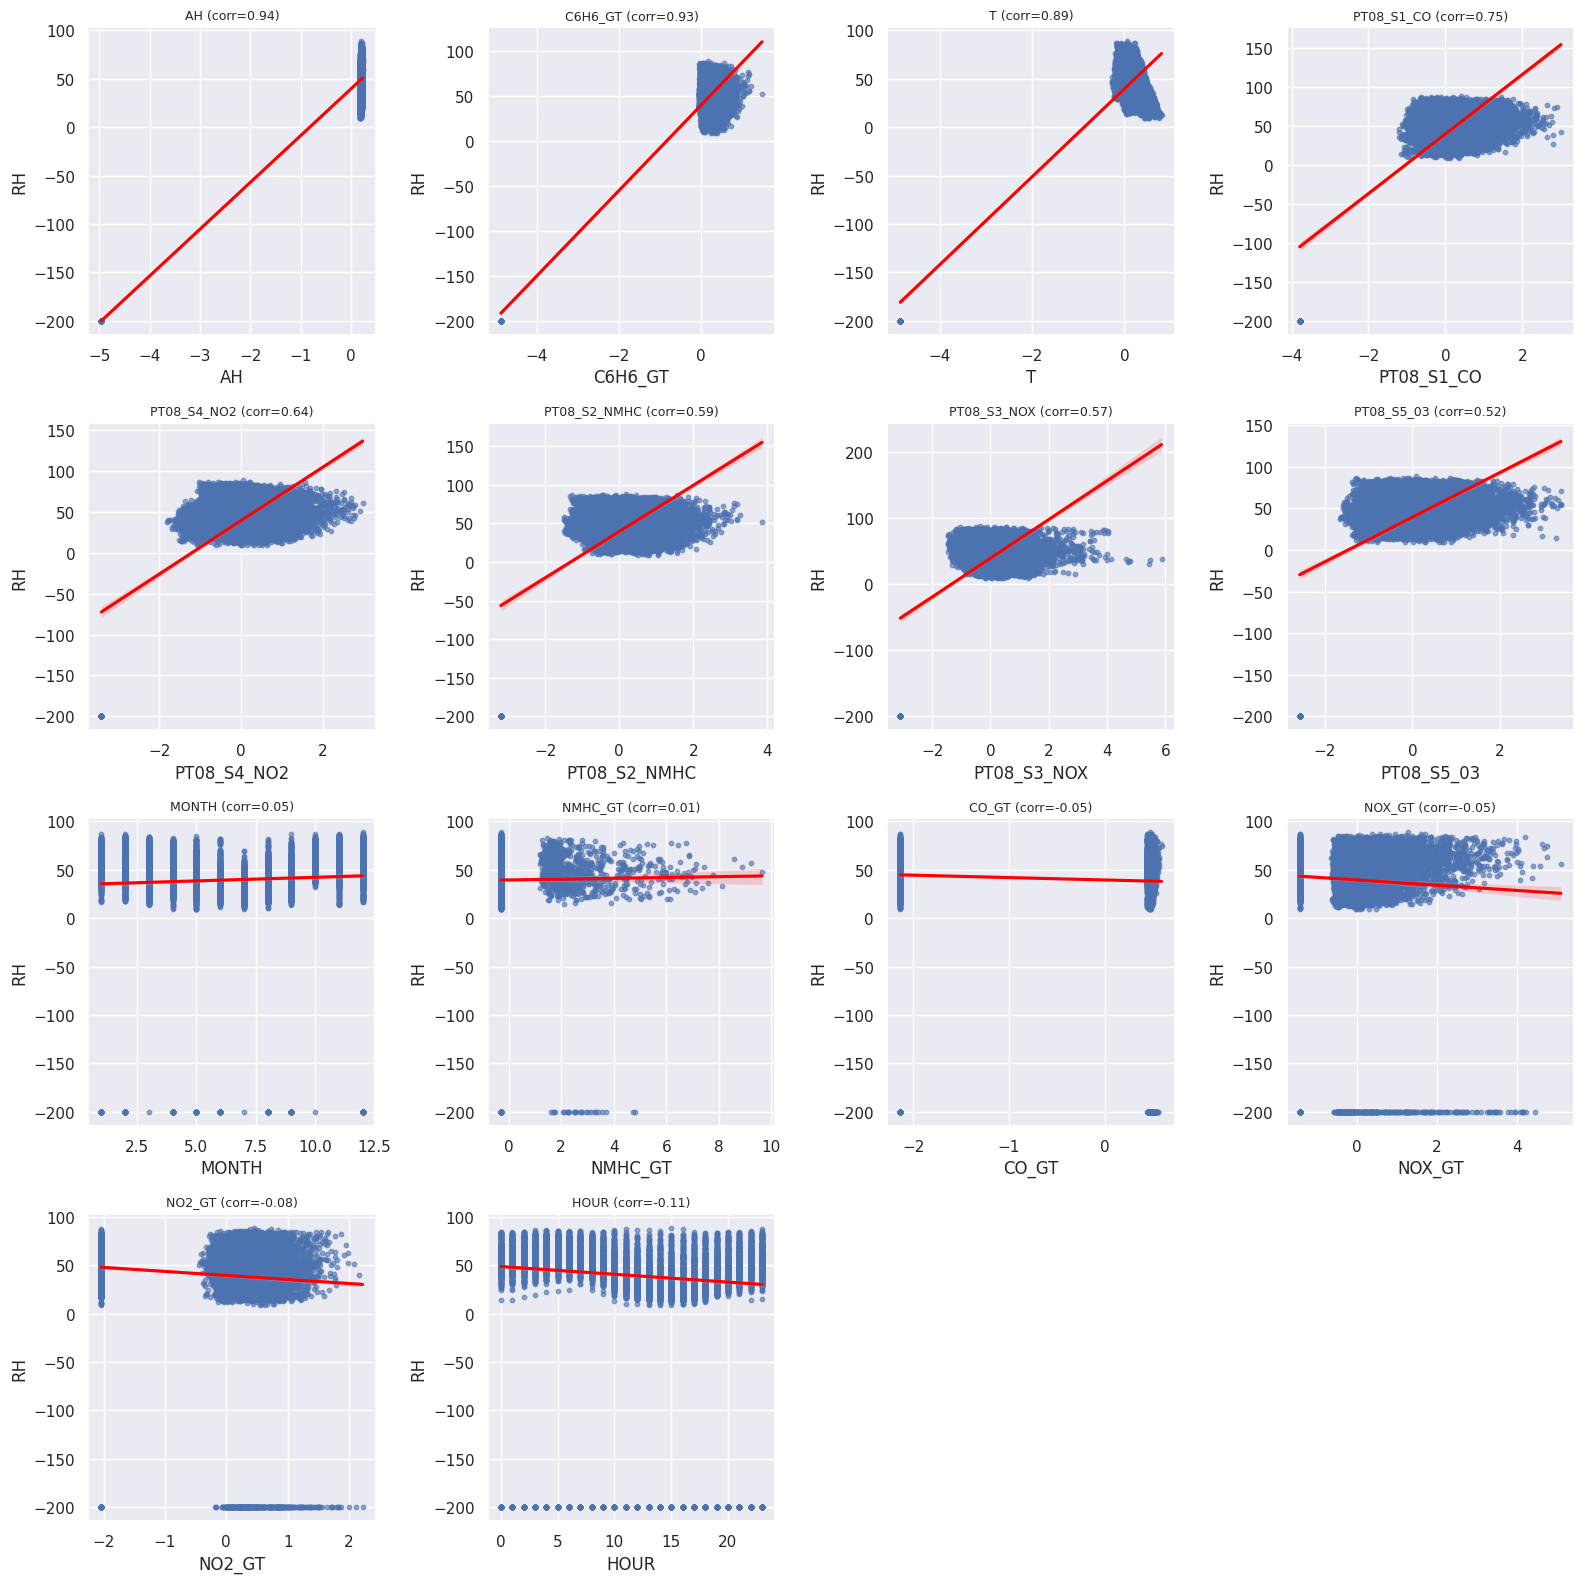

# 8. 모델링

## 8.1. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = df.drop(['RH', 'TIME', 'DATE'], axis=1)
y = df['RH']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X.head()

In [ ]:
y.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=3)

In [ ]:
print(f'Training Data Size: {X_train.shape}')
print(f'Test Data Size: {X_test.shape}')



```
Training Data Size: (5614, 14)
Test Data Size: (3743, 14)
```



In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
print(f'Intercept: {model.intercept_}')



```
Intercept: 39.61360919963028
```



In [ ]:
pred1 = model.predict(X_test)
pred1



```
array([67.22290966, 71.82740726, 49.33816742, ..., 28.00031218,
       69.38704067, 61.75363791])
```



In [ ]:
print('Co-efficient:')
list(zip(X.columns, model.coef_))



```
Co-efficient:
[('CO_GT', np.float64(0.15911444848919698)),
 ('PT08_S1_CO', np.float64(7.618162531383176)),
 ('NMHC_GT', np.float64(-1.9199932762049177)),
 ('C6H6_GT', np.float64(-35.41618220773082)),
 ('PT08_S2_NMHC', np.float64(-19.159748447213566)),
 ('NOX_GT', np.float64(4.26189391892104)),
 ('PT08_S3_NOX', np.float64(-6.679792565838299)),
 ('NO2_GT', np.float64(-3.058575375790447)),
 ('PT08_S4_NO2', np.float64(25.73404902804101)),
 ('PT08_S5_03', np.float64(-1.3920152984890963)),
 ('T', np.float64(-91.46496876948306)),
 ('AH', np.float64(166.65449965998857)),
 ('MONTH', np.float64(4.008234084681771)),
 ('HOUR', np.float64(-0.736072384973123))]
```



In [ ]:
res1 = root_mean_squared_error(y_test, pred1)
print(f'Linear Regression RMSE: {res1}')

```
Linear Regression RMSE: 6.971622985617296
상대 습도가 0~100인 것을 감안하면, RMSE가 조금 큰 편?
```

## 8.2. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoded_y_train = encoder.fit_transform(y_train)
encoded_y_train



```
array([186,  36,  82, ..., 691, 394, 248])
```



In [ ]:
lr.fit(X_train, encoded_y_train)

In [ ]:
pred2 = lr.predict(X_test)
pred2



```
array([566, 390, 312, ..., 125, 639, 541])
```



In [ ]:
res2 = root_mean_squared_error(y_test, pred2)
print(f'Logistic Regression RMSE: {res2}')



```
Logistic Regression RMSE: 341.72132518319455
데이터 특성과 Logistic은 사실 맞지 않는다.
```



## 8.3. Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

In [ ]:
dt.fit(X_train, y_train)

In [ ]:
pred3 = dt.predict(X_test)
pred3



```
array([75.9, 67.1, 54.5, ..., 27.9, 67.6, 62.3])
```



In [ ]:
res3 = root_mean_squared_error(y_test, pred3)
print(f'Decision Tree Regressor RMSE: {res3}')



```
Decision Tree Regressor RMSE: 1.3913409174212177
이미 Corr Heatmap만 봐도 Tree에 적합한 데이터라는 것을 알 수가 있었다.
```



## 8.4. Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
pred4 = rf.predict(X_test)
pred4



```
array([72.295, 67.334, 53.493, ..., 27.759, 68.226, 64.183])
```



In [ ]:
res4 = root_mean_squared_error(y_test, pred4)
print(f'Random Forest Regressor RMSE: {res4}')



```
Random Forest Regressor RMSE: 0.7270419185823491
```



## 8.5. Support Vector Regression

In [ ]:
from sklearn.svm import SVR

svr = SVR()

In [ ]:
svr.fit(X_train, y_train)

In [ ]:
pred5 = svr.predict(X_test)
pred5



```
array([63.57208768, 54.31643596, 48.07740468, ..., 36.60617946,
       61.39761076, 56.67322655])
```



In [ ]:
res5 = root_mean_squared_error(y_test, pred5)
print(f'Support Vector Regression RMSE: {res5}')



```
Support Vector Regression RMSE: 24.505288163741934
Binary Classification이라면 몰라도 이런 문제에는 잘 맞지 않는 듯 하다...
```



## 8.6. 결과 종합

In [ ]:
print(f'Linear Regression = {res1}\n')
print(f'Logistic Regression = {res2}\n')
print(f'Decision Tree Regression = {res3}\n')
print(f'Random Forest Regression = {res4}\n')
print(f'Support Vector Regression = {res5}')

In [ ]:
dict = {'Linear Regression': res1, 'Logistic Regression': res2, 'Decision Tree Regression': res3,
        'Random Forest Regression': res4, 'Support Vector Regression': res5}

results = [k for k in dict if all(dict[temp] >= dict[k] for temp in dict)]
min_RMSE = {k: dict[k] for k in dict.keys() & set(results)}

print(min_RMSE)

# 9. 결론

---

▸ 수많은 Regression 방법들 중에서 어떤 모델로 시작할까

    1. 모델에 사용되는 데이터들은 연속형 데이터가 대부분인데, 결과는 Binary거나 Binary 형태로 변형이 가능할 때는 Logistic Regression
    2. 데이터들이 연속형과 범주형이 섞여있을 때는 Random Forest
    3. 데이터들이 대부분 범주형일 때는 CatBoost

---

    공기질 데이터는 타겟인 RH가 연속형 변수이므로 Logistic Regression 결과가 낮았다.
    Feature 변수 대부분이 연속형 변수이기 때문에 Linear Regression도 좋은 성능을 보이지만,
    일부 변수들이 범주형 성격을 가지고 있기에 Random Forest가 가장 좋게 나왔다.

---

    지속적으로 생성되는 추가 데이터에 대한 모니터링도 중요하다.
    데이터의 특성이 변하거나 X와 Y의 관계도 변할 수가 있기 때문이다.